In [1]:
import torch
import torch.nn as nn

import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import re
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
import os
from PIL import Image

noisy_dir = "C:/Users/user/Desktop/Spectrum Sensing/random_SNR_autoencoder"

clean_dir = "C:/Users/user/Desktop/Spectrum Sensing/SNR_1000_autoencoder"
sig_off_clean = "C:/Users/user/Desktop/Spectrum Sensing/sig_OFF_clean"

# 키 생성 함수
def natural_key(filename):
    return [int(text) if text.isdigit() else text.lower() for text in re.split(r'(\d+)', filename)]
# 이미지 불러오기 및 전처리 함수 정의
def load_images_from_directory(directory):
    images = []
    for filename in sorted(os.listdir(directory), key=natural_key):
        img_path = os.path.join(directory, filename)
        img = Image.open(img_path).convert("L") #이미지 불러오기 & 흑백 변환
        img = np.array(img, dtype=np.float32) / 255.0  # 정규화
        images.append(img)
    return np.stack(images, axis=0)  

noisy_images = load_images_from_directory(noisy_dir) 
clean_images = load_images_from_directory(clean_dir)
sig_off_img = load_images_from_directory(sig_off_clean)

# 깨끗한 이미지를 반복하여 노이지이미지와 크기 맞추기
sig_off_img = np.repeat(sig_off_img, 1000, axis=0)
clean_images = np.concatenate([clean_images, sig_off_img], axis=0)

# 데이터 확인
print(f"Noisy Images Shape: {noisy_images.shape}")
print(f"Clean Images Shape: {clean_images.shape}")

Noisy Images Shape: (40000, 256, 256)
Clean Images Shape: (40000, 256, 256)


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

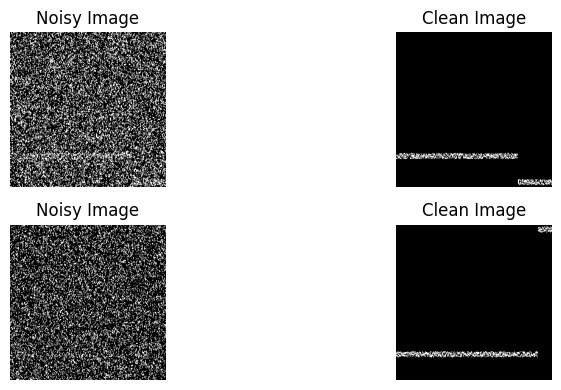

In [ ]:
num_samples = 2

# 샘플로 선택한 노이즈와 클린 이미지 쌍을 플롯
fig, axes = plt.subplots(num_samples, 2, figsize=(10, 2 * num_samples))
for i in range(num_samples):
    noisy_img = noisy_images[i].squeeze()
    clean_img = clean_images[i].squeeze()
    
    # Noisy Image
    axes[i, 0].imshow(noisy_img, cmap="gray")
    axes[i, 0].set_title("Noisy Image")
    axes[i, 0].axis("off")
    
    # Clean Image
    axes[i, 1].imshow(clean_img, cmap="gray")
    axes[i, 1].set_title("Clean Image")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()

In [5]:
bat_size = 50

X_train_np, X_val_np, y_train_np, y_val_np = train_test_split(noisy_images, clean_images, test_size=0.2, random_state=0)
X_val_np, X_test_np, y_val_np, y_test_np = train_test_split(X_val_np, y_val_np, test_size=0.5, random_state=0)

X_train = torch.tensor(X_train_np, dtype=torch.float32).unsqueeze(1).to(device)
y_train = torch.tensor(y_train_np, dtype=torch.float32).unsqueeze(1).to(device)
X_val = torch.tensor(X_val_np, dtype=torch.float32).unsqueeze(1).to(device)
y_val = torch.tensor(y_val_np, dtype=torch.float32).unsqueeze(1).to(device)
X_test = torch.tensor(X_test_np, dtype=torch.float32).unsqueeze(1).to(device)
y_test = torch.tensor(y_test_np, dtype=torch.float32).unsqueeze(1).to(device)

# 데이터셋과 데이터로더 생성
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(dataset=train_dataset, batch_size=bat_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=bat_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=bat_size, shuffle=False)

In [6]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

(torch.Size([32000, 1, 256, 256]),
 torch.Size([32000, 1, 256, 256]),
 torch.Size([4000, 1, 256, 256]),
 torch.Size([4000, 1, 256, 256]),
 torch.Size([4000, 1, 256, 256]),
 torch.Size([4000, 1, 256, 256]))

In [ ]:
class SpectrogramDenoisingAutoencoder(nn.Module):
    def __init__(self):
        super(SpectrogramDenoisingAutoencoder, self).__init__()
        
        self.outoconder = nn.Sequential(
            nn.Conv2d(1, 4, kernel_size=3, stride=2, padding=1), nn.ReLU(),
            nn.ConvTranspose2d(4, 1, kernel_size=3, stride=2, padding=1, output_padding=1), nn.Sigmoid()
        )
        self.outoconder2 = nn.Sequential(
            nn.Conv2d(1, 4, kernel_size=3, stride=2, padding=1), nn.ReLU(),
            nn.ConvTranspose2d(4, 1, kernel_size=3, stride=2, padding=1, output_padding=1), nn.Sigmoid()
        )
        self.outoconder3 = nn.Sequential(
            nn.Conv2d(1, 4, kernel_size=3, stride=2, padding=1), nn.ReLU(),
            nn.ConvTranspose2d(4, 1, kernel_size=3, stride=2, padding=1, output_padding=1), nn.Sigmoid()
        )
        self.outoconder4 = nn.Sequential(
            nn.Conv2d(1, 4, kernel_size=3, stride=2, padding=1), nn.ReLU(),
            nn.ConvTranspose2d(4, 1, kernel_size=3, stride=2, padding=1, output_padding=1), nn.Sigmoid()
        )
        self.outoconder11 = nn.Sequential(
            nn.Conv2d(1, 4, kernel_size=3, stride=2, padding=1), nn.ReLU(),
            nn.ConvTranspose2d(4, 1, kernel_size=3, stride=2, padding=1, output_padding=1), nn.Sigmoid()
        )
    
    def forward(self, x):
        outo1 = self.outoconder(x)
        outo2 = (self.outoconder2(outo1) + outo1)/2
        outo3 = self.outoconder3(outo2)
        outo4 = (self.outoconder4(outo3) + outo3)/2
        last = self.outoconder11(outo4)
        return x, outo3, last

In [ ]:
class HighSignalFocusLoss(nn.Module):
    def __init__(self, signal_weight=5.0, noise_weight=0.1):
        super(HighSignalFocusLoss, self).__init__()
        self.signal_weight = signal_weight
        self.noise_weight = noise_weight

    def forward(self, output, target): 
        signal_mask = (target > 0.8).float()  
        noise_mask = (target <= 0.8).float() 
        signal_loss = torch.mean((output - target) ** 2 * signal_mask) * self.signal_weight
        noise_loss = torch.mean((output - target) ** 2 * noise_mask) * self.noise_weight
        loss = signal_loss + noise_loss
        return loss

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters())

from ranger import Ranger
model = SpectrogramDenoisingAutoencoder().to(device)
criterion = HighSignalFocusLoss(signal_weight=0.97, noise_weight=0.03)
optimizer = Ranger(model.parameters(), lr=0.01) 

total_params = count_parameters(model)
print(f"Total number of parameters: {total_params}")

In [ ]:
patience = 15
num_epochs = 3000
best_val_loss = float('inf')
patience_counter = 0

for epoch in range(num_epochs):
    train_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs, targets.to(device)
        out1, out2, out3 = model(inputs)
        loss = criterion(out3, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)  # 배치 크기 고려
    train_loss = train_loss / len(train_loader.dataset)
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs, targets.to(device)
            out1, out2, out3 = model(inputs)
            loss = criterion(out3, targets)
            val_loss += loss.item() * inputs.size(0)
    val_loss = val_loss / len(val_loader.dataset)
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        checkpoint = {
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': best_val_loss,
            'epoch': epoch
        }
        torch.save(checkpoint, 'checkpoint/best_model.pth')
        print(f'Checkpoint saved at epoch {epoch+1} with validation loss: {10000*best_val_loss:.4f} // Training Loss: {10000*train_loss:.4f}')
        patience_counter = 0  # patience counter를 리셋합니다.
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break
        

# 체크포인트 불러오기
checkpoint = torch.load('checkpoint/best_model.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
best_val_loss = checkpoint['loss']

print(f'Model loaded from checkpoint with loss: {best_val_loss:.4f} at epoch: {epoch+1}')

In [ ]:
idx = 17117 

test_noisy_spectrogram = np.expand_dims(noisy_images[idx], axis=0) 
test_noisy_spectrogram = np.expand_dims(test_noisy_spectrogram, axis=0)  
test_noisy_spectrogram = torch.tensor(test_noisy_spectrogram).to(device)

# 모델 예측
out1, out2, output = model(test_noisy_spectrogram)
output = output.detach().cpu().numpy().squeeze()  
out2 = out2.detach().cpu().numpy().squeeze()  
test_clean_spectrogram = clean_images[idx].squeeze()

# 플롯팅
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(test_noisy_spectrogram.cpu().squeeze(), cmap="gray")
axes[0].set_title("Noisy Input")

axes[1].imshow(test_clean_spectrogram, cmap="gray")
axes[1].set_title("Clean Target")

axes[2].imshow(out2, cmap="gray")
axes[2].set_title("middle Output")

axes[3].imshow(output, cmap="gray")
axes[3].set_title("Denoised Output")

plt.show()

In [ ]:
model.eval()
with torch.no_grad():
    X_test = X_test.to(device)
    y_test = y_test.to(device)
    out1, out2, out3 = model(inputs)
    loss = criterion(out3, targets)
    eval_loss = loss.item()
    print(f'Test Loss: {100*eval_loss:.4f}')
    
    # 예측 결과 출력
    predictions = out3.cpu().numpy()
    actuals = y_test.cpu().numpy()

In [ ]:
PATH = f'./SpectrogramDenoisingAutoencoder_{bat_size}.pth'
torch.save(model.state_dict(), PATH)